In [70]:

import numpy as np # linear algebra
from sklearn.model_selection import GridSearchCV
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

DATA = pd.read_csv("input/glass.csv")
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# Data quick preparation


In [71]:
# Let's run the preprocessing on both train and test data

PROCESSED = DATA.copy(deep=True)

PROCESSED["Na"] = PROCESSED["Na"]/10
PROCESSED["Si"] = PROCESSED["Si"]/30
PROCESSED["Mg"] = PROCESSED["Mg"]/4
PROCESSED["Ca"] = PROCESSED["Ca"]/8
PROCESSED["RI"] = PROCESSED["RI"]/1.5

PROCESSED.head()
# df['Age'].fillna(df["Age"].mean(), inplace=True)
# fill missing embarked values with the most common one
# df['Embarked'].fillna('S', inplace=True)
# we don't need whole age, as experiments show that age < 18
# is most important for survival
# df["is_child"] = df["Age"]<18

# cols = ['Name', 'Cabin', 'Ticket', 'PassengerId']
# df.drop(cols, axis=1, inplace=True)
# for the need of Receiver Operating Characteristic (ROC) diagram we need to convert strings to ints
# PROCESSED.replace('Iris-setosa', 1, inplace=True)
# PROCESSED.replace('Iris-versicolor', 2, inplace=True)
# PROCESSED.replace('Iris-virginica', 3, inplace=True)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.014007,1.364,1.1225,1.10,2.392667,0.06,1.09375,0.0,0.0,1
1,1.011740,1.389,0.9000,1.36,2.424333,0.48,0.97875,0.0,0.0,1
2,1.010787,1.353,0.8875,1.54,2.433000,0.39,0.97250,0.0,0.0,1
3,1.011773,1.321,0.9225,1.29,2.420333,0.57,1.02750,0.0,0.0,1
4,1.011613,1.327,0.9050,1.24,2.436000,0.55,1.00875,0.0,0.0,1


# Preparing for Model Training

## Separating target from features

In [72]:
y = PROCESSED['Type']
X = PROCESSED.drop(['Type'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


X shape:  (214, 9)
> Model: GaussianNB
- Accuracy score:  0.37209302325581395
- Accuracy count:  16 / 43
- Precision score:  0.3964562569213732
- Recall score:  0.37209302325581395
- F1 score:  0.35631229235880396
GridSearchCV Training Results:
- Best Score:  0.4727731092436975
Params:
- cv:  5
- Splitter Params:  {'train_size': 0.8, 'random_state': 0}
- Model Params:  GaussianNB()
- Best H-Params:  {}

> Model: KNeighborsClassifier
- Accuracy score:  0.5348837209302325
- Accuracy count:  23 / 43
- Precision score:  0.49177085154747335
- Recall score:  0.5348837209302325
- F1 score:  0.49170287077263813
GridSearchCV Training Results:
- Best Score:  0.6601680672268907
Params:
- cv:  5
- Splitter Params:  {'train_size': 0.8, 'random_state': 0}
- Model Params:  KNeighborsClassifier()
- Best H-Params:  {'n_neighbors': 15}

> Model: SVC
- Accuracy score:  0.5813953488372093
- Accuracy count:  25 / 43
- Precision score:  0.578218802821006
- Recall score:  0.5813953488372093
- F1 score:  0.55

/Users/kkepins-macwro_1/.local/share/virtualenvs/data-science-upskills-eseJr18D/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kkepins-macwro_1/.local/share/virtualenvs/data-science-upskills-eseJr18D/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kkepins-macwro_1/.local/share/virtualenvs/data-science-upskills-eseJr18D/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

- Accuracy score:  0.627906976744186
- Accuracy count:  27 / 43
- Precision score:  0.6534883720930232
- Recall score:  0.627906976744186
- F1 score:  0.6210474887629471
GridSearchCV Training Results:
- Best Score:  0.7776470588235295
Params:
- cv:  5
- Splitter Params:  {'train_size': 0.8, 'random_state': 0}
- Model Params:  RandomForestClassifier()
- Best H-Params:  {}

> Model: XGBClassifier


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kkepins-macwro_1/.local/share/virtualenvs/data-science-upskills-eseJr18D/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kkepins-macwro_1/.local/share/virtualenvs/data-science-upskills-eseJr18D/lib/python3.10/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/Users/kkepins-macwro_1/.local/share/virtualenvs/data-science-upskills-eseJr18D/lib/python3.10/site-packages/xgboost/sklearn.py", line 1466, in fit
    raise ValueError(
ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got [1 2 3 5 6 7]


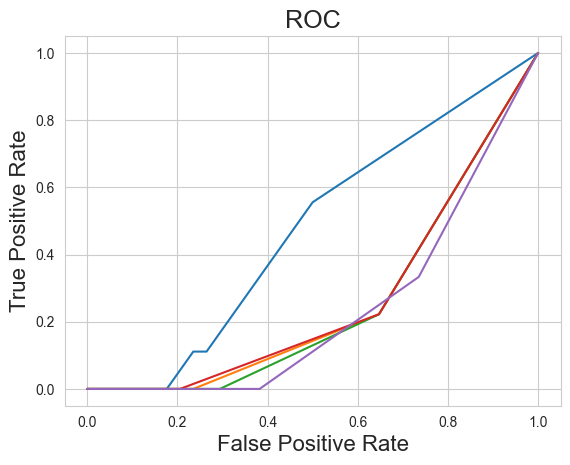

In [73]:
from libs.simple_hyper_tuner import quick_gridsearchcv_overview

winner = quick_gridsearchcv_overview(X, y, [5])

## Splitting train data into train & validation data
as we can see the number of records in train data is lowered

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 16 to 172
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      171 non-null    float64
 1   Na      171 non-null    float64
 2   Mg      171 non-null    float64
 3   Al      171 non-null    float64
 4   Si      171 non-null    float64
 5   K       171 non-null    float64
 6   Ca      171 non-null    float64
 7   Ba      171 non-null    float64
 8   Fe      171 non-null    float64
dtypes: float64(9)
memory usage: 13.4 KB


# Models Training & Hyper-params Tuning for Different Classification Models


In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from libs.simple_processing import get_model_name, print_scores
from xgboost import XGBClassifier
params = [
    {
        'model': GradientBoostingClassifier(criterion='squared_error', loss='log_loss', max_features=1.0),
        'hyperparams': {
            # 'criterion': ['friedman_mse', 'mse', 'mae'],
            # 'loss':['deviance', 'exponential'],
            'random_state': range(6, 9, 1),
            'n_estimators': range(15, 25, 2),
            'learning_rate': np.arange(0.1, 0.9, 0.1),
            'max_depth': range(1, 6, 1)
        }
    }
]

grid_model = {}

for p in params:
    print('> Model:', get_model_name(p['model']))
    grid_model = GridSearchCV(p['model'], p['hyperparams'], cv=2, n_jobs=3, scoring='accuracy', verbose=1)
    grid_model.fit(X_train, y_train)
    y_pred = grid_model.predict(X_valid)
    print("================================================")
    print(grid_model.best_score_)
    print(grid_model.best_params_)
    print("================================================")


print('Done.')

> Model: GradientBoostingClassifier
Fitting 2 folds for each of 600 candidates, totalling 1200 fits
0.772093023255814
{'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 19, 'random_state': 7}
Done.


## And The Winner Is....


## Score
Accuracy score / Dokładność [(TP+TN) / (TP+TN+FP+FN)]: how many of the values were predicted correctly?
Accuracy count: number of correct predictions
Precision score / Precyzja [TP / (TP+FP)]: how many passengers that the model thought survived actually did survive?
Recall score / Pełność [TP / (TP+FN]: how many of the actual survivors the model correctly predicted?
(also known as true positive rate / wskaźnik skuteczności - ryzyko niepoprawnego oznaczenia ofiary wypadku)
F1 score [2(prec x rec) / (prec + rec)]: combination of the above precision and recall scores

In [74]:
model = GradientBoostingClassifier(learning_rate=0.5, max_depth=4, n_estimators=19, random_state=7, criterion='squared_error', loss='log_loss', max_features=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
print_scores(y_valid, y_pred)

Accuracy score:  0.6511627906976745
Accuracy count:  28 / 43
Precision score:  0.6364341085271318
Recall score:  0.6511627906976745
F1 score:  0.6279743198347849



/Users/kkepins-macwro_1/.local/share/virtualenvs/data-science-upskills-eseJr18D/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Receiver Operating Characteristic (ROC)

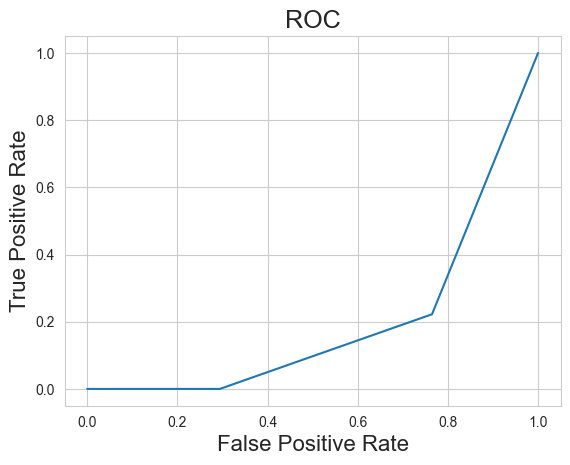

In [75]:
from libs.simpleplotter import simple_roc

simple_roc(y_valid, y_pred)

## Confusion Matrix / Macierz pomyłek

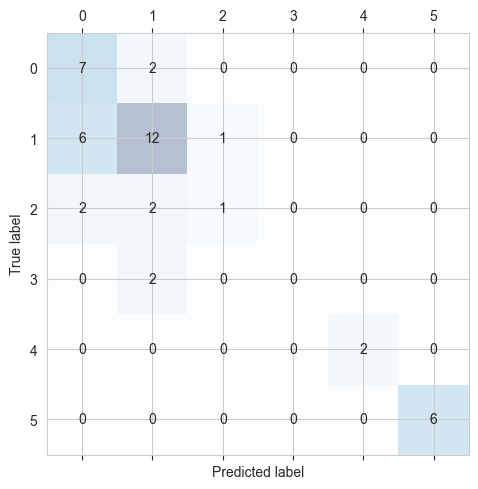

In [76]:
from libs.simpleplotter import simple_confusion_matrix
conf_matrix = simple_confusion_matrix(y_valid, y_pred, model.classes_)

In [63]:
print('TP:', conf_matrix[1][1])
print('TN:', conf_matrix[0][0])
print('FP:', conf_matrix[0][1])
print('FN:', conf_matrix[1][0])

TP: 12
TN: 7
FP: 2
FN: 6


## Which features became decision makers for the model?

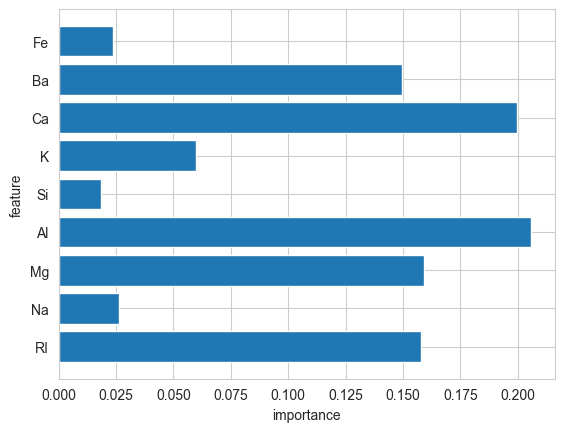

In [64]:
from libs.simpleplotter import feature_importance

feature_importance(model, X_train)